# Principal Component Analysis

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## The Data

Let's work with the cancer data set again since it had so many features.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [16]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [17]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualization

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [20]:
scaled_data = scaler.transform(df)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA()

In [23]:
pca.fit(scaled_data)

PCA()

Now we can transform this data to its first 2 principal components.

In [24]:
pca_data = pca.transform(scaled_data)

In [25]:
scaled_data.shape

(569, 30)

In [26]:
pca_data.shape

(569, 30)

In [28]:
##constructs scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

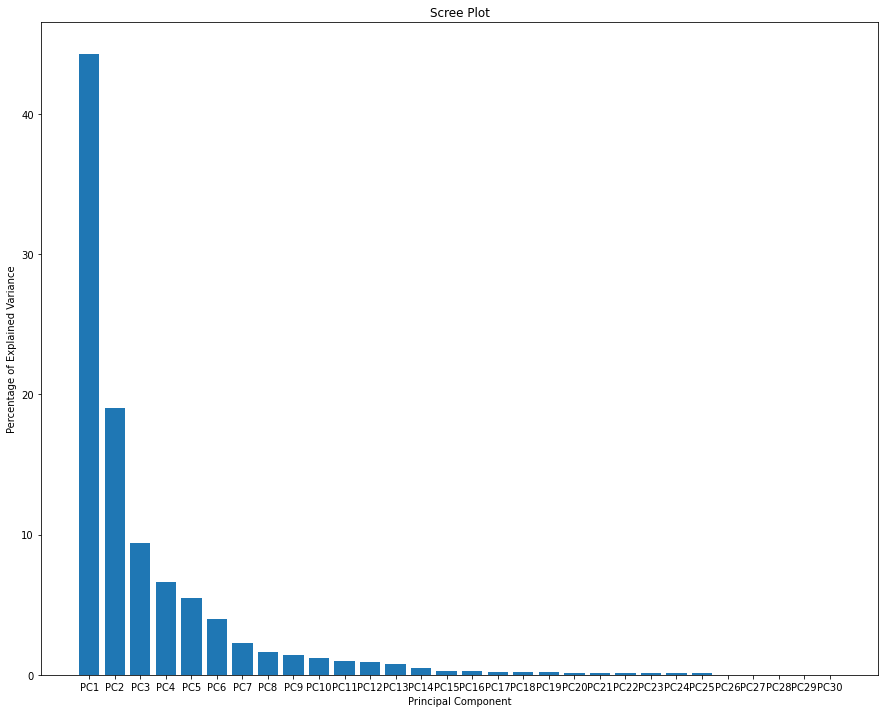

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(15,12))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
plt.tight_layout()

In [34]:
pca_df = pd.DataFrame(pca_data, columns=labels)
 
pca_df.head(999)
 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


Text(0, 0.5, 'PC2 - 19.0%')

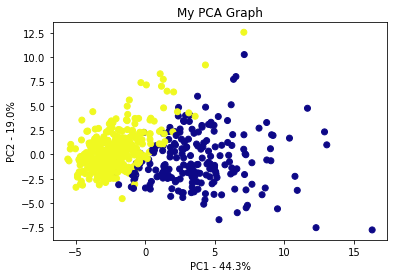

In [50]:
plt.scatter(pca_df.PC1, pca_df.PC2,c=cancer['target'],cmap='plasma')
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))



Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [55]:
pca.components_

array([[-0.21890244, -0.10372458, -0.22753729, -0.22099499, -0.14258969,
        -0.23928535, -0.25840048, -0.26085376, -0.13816696, -0.06436335,
        -0.20597878, -0.01742803, -0.21132592, -0.20286964, -0.01453145,
        -0.17039345, -0.15358979, -0.1834174 , -0.04249842, -0.10256832,
        -0.22799663, -0.10446933, -0.23663968, -0.22487053, -0.12795256,
        -0.21009588, -0.22876753, -0.25088597, -0.12290456, -0.13178394],
       [ 0.23385713,  0.05970609,  0.21518136,  0.23107671, -0.18611302,
        -0.15189161, -0.06016536,  0.0347675 , -0.19034877, -0.36657547,
         0.10555215, -0.08997968,  0.08945723,  0.15229263, -0.20443045,
        -0.2327159 , -0.19720728, -0.13032156, -0.183848  , -0.28009203,
         0.21986638,  0.0454673 ,  0.19987843,  0.21935186, -0.17230435,
        -0.14359317, -0.09796411,  0.00825724, -0.14188335, -0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [56]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

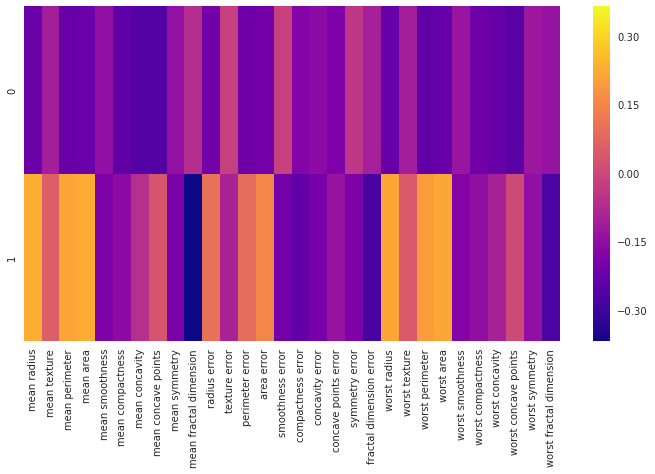

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

Hopefully this information is useful to you when dealing with high dimensional data!

# Great Job!